# Review of Statistical Tests

## Test Kruskal-Wallis

El test de Kruskal-Wallis, también conocido como test H, es la alternativa no paramétrica al test ANOVA de una vía para datos no pareados. Se trata de una extensión del test de Mann-Whitney para más de dos grupos. Es por lo tanto de un test que emplea rangos para contrastar la hipótesis de que k muestras han sido obtenidas de una misma población.

A diferencia del ANOVA en el que se comparan medias, el test de Kruskal-Wallis contrasta si las diferentes muestras están equidistribuidas y que por lo tanto pertenecen a una misma distribución (población). Bajo ciertas simplificaciones puede considerarse que el test de Kruskal-Wallis compara las medianas.

- H0: todas las muestras provienen de la misma población (distribución).
- HA: Al menos una muestra proviene de una población con una distribución distinta.

El test de Kruskal-Wallis es el test adecuado cuando los datos tienen un orden natural, es decir, cuando para darles sentido tienen que estar ordenados o bien cuando no se satisfacen las condiciones para poder aplicar un ANOVA.


Supóngase que se dispone de k grupos cada uno con n observaciones. Si se ordenan todas las observaciones de menor a mayor y se le asigna a cada una de ellas su rango, cuando se obtenga la suma de rangos para cada uno de los grupos (Ri) es de esperar que, si se cumple la hipótesis nula, todos los grupos tengan un valor similar. Partiendo de esta idea se calcula el estadístico H como:


$$ H = 12/(N/(N+1)) * (\sum_{i = 1}^{k} R_{i}^2 - 3(N+1)) $$

**Condiciones**

- No es necesario que las muestras que se comparan provengan de una distribución normal.

- Homocedasticidad: dado que la hipótesis nula asume que todos los grupos pertenecen a una misma población y que por lo tanto tienen las mismas medianas, es requisito necesario que todos los grupos tengan la misma varianza. Se puede comprobar con representaciones gráficas o con los test de Levenne o Barttlet.

- Misma distribución para todos los grupos: la distribución de los grupos no tiene que ser normal pero ha de ser igual en todos (por ejemplo que todos muestren asimetría hacia la derecha).


Si estos requerimientos se cumplen, el estadístico H del test de Kruskal-Wallis se compara con:

Si el tamaño de grupos k es igual a 3 y el número de observaciones en cada uno no es mayor que 5, se recurre a tablas tabuladas con valores teóricos de H.

En el resto de casos se asume que el estadístico H sigue una distribución χ2 con k-1 grados de libertad (siendo k el número de grupos a comparar).

In [1]:
datos <- data.frame(
    condicion = c(rep("condicion1", 18), rep("condicion2", 18), rep("condicion3", 18)),
    n_huevos = c(
        1, 2, 3, 4, 5, 6, 7, 8, 9, 16, 27, 28, 29, 30, 51, 52, 53, 342, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 67, 88, 89, 90, 91, 92, 93, 94, 293,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 25, 36, 37, 58, 59, 60, 71, 72
    )
)
head(datos)

,condicion,n_huevos
,<fct>,<dbl>
1,condicion1,1
2,condicion1,2
3,condicion1,3
4,condicion1,4
5,condicion1,5
6,condicion1,6


In [2]:
aggregate(n_huevos ~ condicion, data = datos, FUN = median)

condicion,n_huevos
<fct>,<dbl>
condicion1,12.5
condicion2,57.5
condicion3,26.5


In [3]:
aggregate(n_huevos ~ condicion, data = datos, FUN = sd)

condicion,n_huevos
<fct>,<dbl>
condicion1,78.10637
condicion2,58.41750
condicion3,18.59097


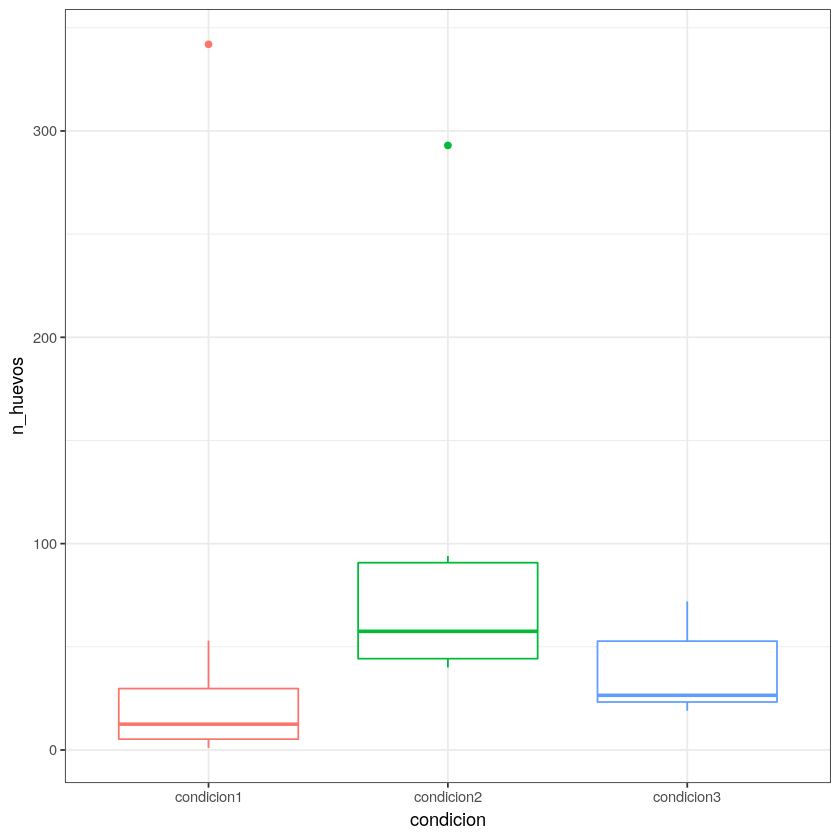

In [4]:
library(ggplot2)

ggplot(data = datos, mapping = aes(x = condicion, y = n_huevos, colour = condicion)) +
    geom_boxplot() +
    theme_bw() +
    theme(legend.position = "none")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



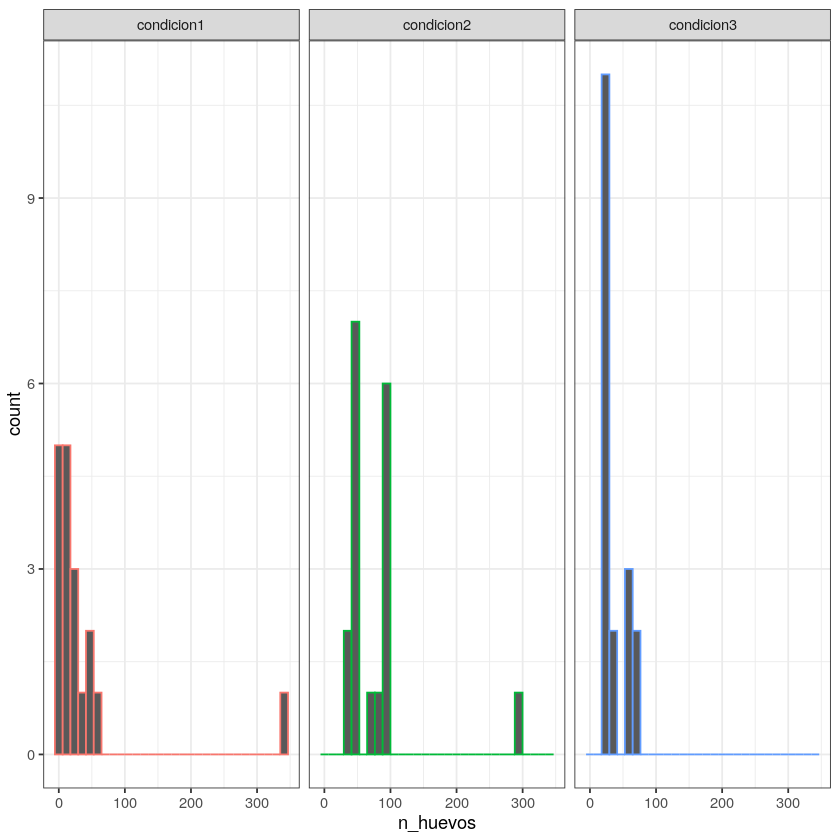

In [5]:
ggplot(data = datos, mapping = aes(x = n_huevos, colour = condicion)) +
    geom_histogram() +
    theme_bw() +
    facet_grid(. ~ condicion) +
    theme(legend.position = "none")

La representación gráfica de los datos muestra que las muestras no se distribuyen de forma normal, lo que supone una limitación para emplear un test ANOVA. Las tres muestras presentan el mismo tipo de distribución, asimetría hacia la derecha, a falta de comprobar la homogeneidad de varianza el test de Kruskal-Wallis es la opción más adecuada (otra alternativa serían las técnicas de resampling).


**Condiciones**

Homocedasticidad: la varianza debe de ser constante entre todos los grupos.

In [7]:
library(car)
leveneTest(n_huevos ~ condicion, data = datos, center = "median")

Loading required package: carData



,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.7929454,0.458009
,51,NA,NA


**Ahora empleamos el test de Kruskal-Wallis**

El test encuentra significancia en la diferencia de al menos dos grupos.

In [8]:
kruskal.test(n_huevos ~ condicion, data = datos)


	Kruskal-Wallis rank sum test

data:  n_huevos by condicion
Kruskal-Wallis chi-squared = 19.964, df = 2, p-value = 4.623e-05


**Comparaciones post-hoc para saber que dos grupos difieren**

Existen diferentes métodos de corrección del nivel de significancia, entre ellos destacan el de Bonferroni que es muy estricto y el de holm, este último parece ser más recomendado.

*Las comparaciones por pares encuentran diferencias significativas entre todas las condiciones.*

In [9]:
pairwise.wilcox.test(x = datos$n_huevos, g = datos$condicion, p.adjust.method = "holm")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test 

data:  datos$n_huevos and datos$condicion 

           condicion1 condicion2
condicion2 0.00029    -         
condicion3 0.04795    0.00058   

P value adjustment method: holm 

**Cálculo de tamaño del efecto**

Finalmente, para aquellas comparaciones que se consideren significativas se tiene que reportar el tamaño del efecto (no existe forma de calcular el tamaño del efecto para el test de Kruskal-Wallis en conjunto). En este caso se han realizado comparaciones con Mann-Whitney-wilcox (ver en capítulo dedicado a este test para saber cómo se calcula).

In [10]:
sesion_info <- devtools::session_info()
dplyr::select(
    tibble::as_tibble(sesion_info$packages),
    c(package, loadedversion, source)
)

ERROR: Error in loadNamespace(name): there is no package called ‘devtools’


## Test de Friedman

El test de Friedman es la alternativa no paramétrica a la prueba ANOVA de una vía cuando los datos son dependientes (pareados). Se trata de una extensión de la prueba de los rangos con signo de Wilcoxon para más de dos grupos (basada en suma de rangos). Asumiendo ciertas simplificaciones, puede considerarse como una comparación entre las medianas de varios grupos.

El test de Friedman es el test adecuado cuando los datos tienen un orden natural, (cuando para darles sentido tienen que estar ordenados) y además son pareados. Por ejemplo, si se quiere estudiar la diferencia en el rendimiento de un grupo de corredores dependiendo de la estación del año, se hace correr al mismo grupo de personas una vez en cada estación. Como resultado, se puede disponer de dos tipos de datos: los tiempos de cada participante (análisis con ANOVA pareado) o las posiciones en las que han terminado la carrera cada participante en cada una de las carreras (análisis con Friedman test).

EL concepto es similar a la suma de rangos de Wilcoxon para dos grupos pero esta vez asignando los rangos dentro de cada fila (ya que hay más de dos medidas para cada individuo) y después haciendo la suma de rangos para cada columna.

El test de Friedman genera un estadístico conocido como Fr o Q que se distribuye:

- Si el número total de individuos (N) es mayor de 10, la distribución de Fr se aproxima a una distribución χ2 con k−1 grados de libertad (siendo k el número de grupos a comparar).

- Si el número de individuos es menor de 10, se recurre a tablas con los valores de significancia para un test de Friedman.

### Comparaciones Post-Hoc

Al igual que ocurre con un ANOVA, si el test de Friedman es significativo implica que, al menos dos grupos de entre los comparados, son significativamente diferentes, pero no indica cuales. Para saberlo es necesario compararlos todos entre ellos. Esto implica realizar una corrección del nivel de significancia para evitar incrementar el error de tipo I. Los dos métodos de comparación post-hoc más empleados para un test de Friedman son:

- Test de rangos con signo de Wilcoxon entre cada par de grupos con corrección de significancia:
   pairwise.wilcox.test( paried = TRUE ).

- Tukey’s range test: en R existe la función friedmanmc() del paquete pgirmess.

## Tamaño del efecto

No hay una manera general de calcular el tamaño del efecto de una prueba de Friedman. Lo que se suele hacer es calcular el tamaño del efecto sobre las parejas que hayan resultado significativamente distintas en el análisis post-hoc. Si las comparaciones post-hoc se hacen mediante la prueba de rangos con signo de Wilcoxon, se tendrá que calcular el efecto asociado a dicho test.

In [11]:
valoracion <- c(9, 5, 2, 6, 3, 1, 5, 5, 5, 11, 5, 1, 8, 4, 3, 10, 4, 1, 7, 3, 4)
hora <- factor(rep(c("mañana", "tarde", "noche"), 7))
sujeto <- factor(rep(1:7, each = 3))
datos <- data.frame(valoracion, hora, sujeto)
head(datos)

,valoracion,hora,sujeto
,<dbl>,<fct>,<fct>
1,9,mañana,1
2,5,tarde,1
3,2,noche,1
4,6,mañana,2
5,3,tarde,2
6,1,noche,2


In [12]:
by(data = datos$valoracion, INDICES = datos$hora, FUN = median)

datos$hora: mañana
[1] 8
------------------------------------------------------------ 
datos$hora: noche
[1] 2
------------------------------------------------------------ 
datos$hora: tarde
[1] 4

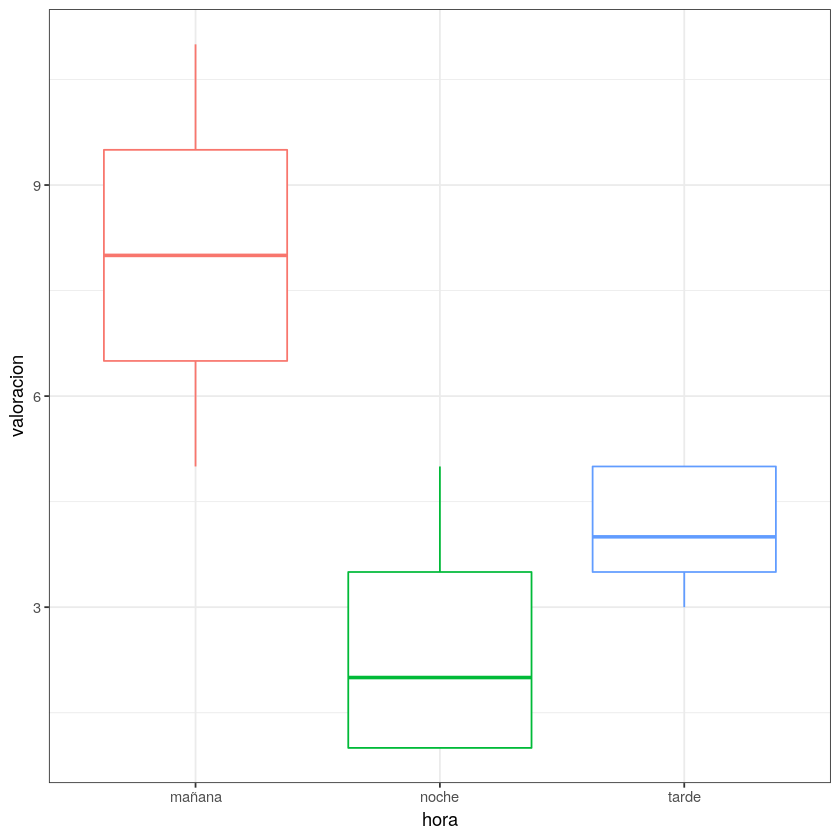

In [13]:
library(ggplot2)
ggplot(data = datos, mapping = aes(x = hora, y = valoracion, colour = hora)) +
    geom_boxplot() +
    theme_bw() +
    theme(legend.position = "none")

In [14]:
friedman.test(valoracion, hora, sujeto)


	Friedman rank sum test

data:  valoracion, hora and sujeto
Friedman chi-squared = 10.333, df = 2, p-value = 0.005704


El test encuentra diferencias significativas entre al menos dos grupos. Para saber cuáles son, se realizan comparaciones dos a dos empleando el test de Wilcoxon rangos con signo.

**Comparaciones múltiples**

A pesar de que el test de Friedman resulta significativo, las comparaciones por pares mediante wilcox test con corrección de holm no encuentran ninguna diferencia significativa.

In [15]:
pairwise.wilcox.test(datos$valoracion, datos$hora, paired = TRUE, p.adjust.method = "holm")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with zeroes”



	Pairwise comparisons using Wilcoxon signed rank test 

data:  datos$valoracion and datos$hora 

      mañana noche
noche 0.1    -    
tarde 0.1    0.1  

P value adjustment method: holm 

## Test de Wilcoxon Mann Whitney como alternativa al t-test

En este capítulo se hace una comparativa entre el test estadístico no paramétrico Mann–Whitney–Wilcoxon y el t-test.

El t-test es un test estadístico paramétrico que permite contrastar la hipótesis nula de que las medias de dos poblaciones son iguales, frente a la hipótesis alternativa de que no lo son.

A pesar de la sencillez y utilidad del t-test, para que sus resultados sean válidos es necesario que se cumplan una serie de condiciones, entre las que se encuentran:

- Independencia: Las observaciones tienen que ser independientes las unas de las otras. Para ello, el muestreo debe ser aleatorio y el tamaño de la muestra inferior al 10% de la población. (Existe una adaptación de t-test para datos pareados)

- Normalidad: Las poblaciones que se comparan tienen que seguir una distribución normal. Si bien la condición de normalidad recae sobre las poblaciones, no se suele disponer de información sobre ellas, por lo que se emplean las muestras (dado que son reflejo de la población) para determinarlo. En caso de cierta asimetría, los t-test son considerablemente robustos si el tamaño de las muestras es mayor o igual a 30.

- Igualdad de varianza (homocedasticidad): la varianza de las poblaciones comparadas debe de ser igual. Tal como ocurre con la condición de normalidad, si no se dispone de información de las poblaciones, esta condición se ha de asumir a partir de las muestras. En caso de no cumplirse esta condición se puede emplear un Welch Two Sample t-test, que incorpora una corrección a través de los grados de libertad que compensa la diferencia de varianzas, con el inconveniente de que pierde poder estadístico.

### Evaluación del t-test con distribuciones no normales para distintos tamaños muestrales

Una de las principales razones que por las que los investigadores descartan la utilización del t-test es por la falta de normalidad en la distribución de las muestras. Si bien es cierto que el t-test requiere como condición que las poblaciones de origen sigan una distribución normal, a medida que se incrementa el tamaño de las muestras se vuelve menos sensible al no cumplimiento de esta condición. En el siguiente ejemplo se simulan dos poblaciones con la misma media, una de las cuales tiene mucha asimetría, y se evalúa el resultado de un t-test para diferentes tamaños muestrales.

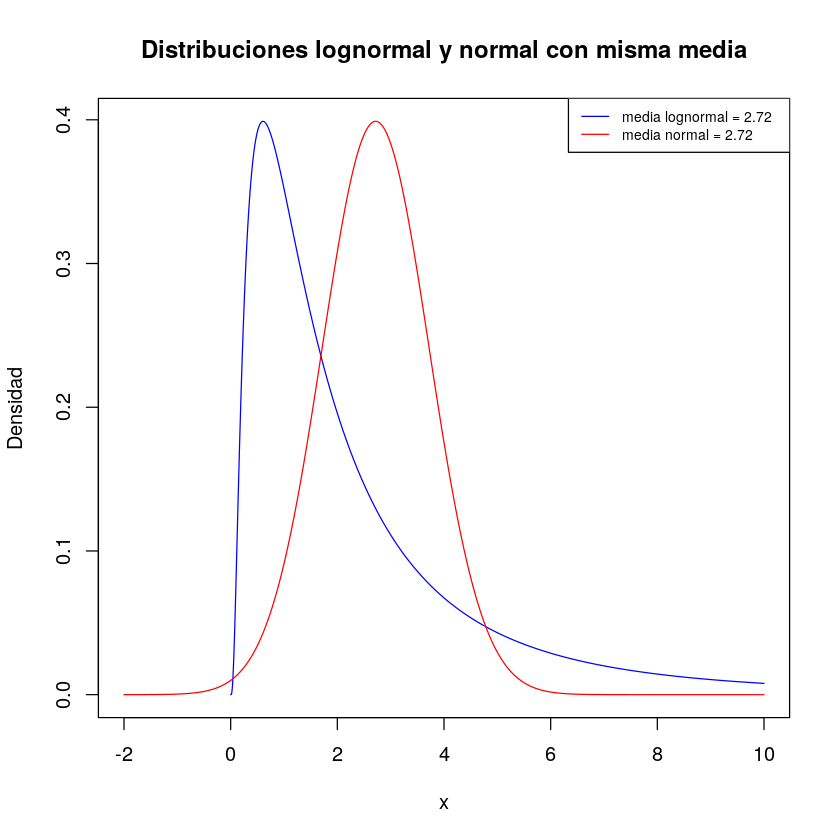

In [16]:
x <- seq(0, 10, length = 1000)
y <- dlnorm(x = x, meanlog = 0.5, sdlog = 1)
plot(x, y,
    type = "l", lty = 1, xlab = "x", col = "blue", ylab = "Densidad",
    main = "Distribuciones lognormal y normal con misma media",
    xlim = c(-2, 10)
)
x_2 <- seq(-2, 10, length = 1000)
y_2 <- dnorm(x = x_2, mean = 2.718282, sd = 1)
lines(x_2, y_2, col = "red")
legend("topright",
    legend = c("media lognormal = 2.72", "media normal = 2.72"),
    col = c("blue", "red"), lty = 1, cex = 0.7
)

Para los tamaños muestrales 5, 10, 20, 30, 50, 100, 200, 300, 500 se extraen 1000 observaciones y se identifica el porcentaje test que se considerarían significativos para un nivel de significancia α=0.05. El nivel basal esperado es del 5%.

In [17]:
test_significativos <- vector(mode = "numeric")
tamanyo_muestral <- c(5, 10, 20, 30, 50, 100, 200, 300, 500)
for(i in tamanyo_muestral){
  p_values <- rep(NA, 1000)
  for(j in 1:1000) {
    muestra_a <- rlnorm(n = i, meanlog =  0.5, sdlog = 1)
    muestra_b <- rnorm(n = i, mean = 2.718282, sd = 1)
    p_values[j] <- t.test(muestra_a, muestra_b, var.equal = FALSE)$p.value
  }
test_significativos <- c(test_significativos, mean(p_values < 0.05)*100)
}
names(test_significativos) <- c(5, 10, 20, 30, 50, 100, 200, 300, 500)
test_significativos

5   10   20   30   50  100  200  300  500 
14.9 12.5 13.2  7.8  8.0  7.8  6.3  6.3  6.4

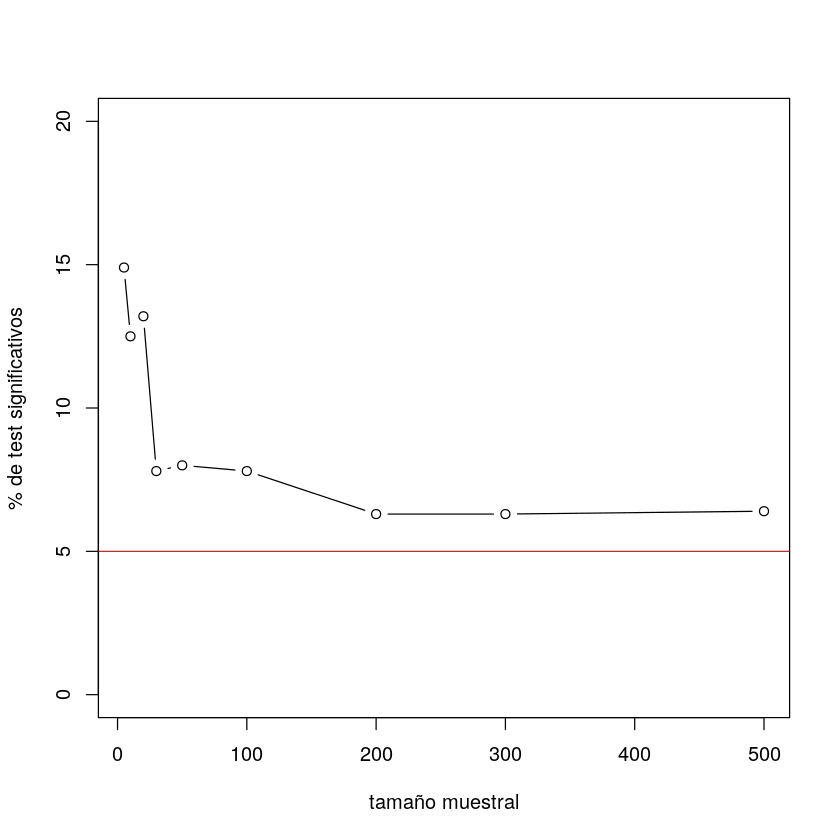

In [18]:
plot(
    x = tamanyo_muestral, y = test_significativos, type = "b", ylim = c(0, 20),
    ylab = "% de test significativos", xlab = "tamaño muestral"
)
abline(h = 5, col = "firebrick")

La simulación muestra que, debido a la pronunciada desviación respecto de la normalidad que presenta una de las poblaciones, para tamaños muestrales por debajo de 100 observaciones el % de test que resultan significativos está bastante por encima del nivel basal, lo que da lugar a demasiados falsos positivos. A partir de 100 observaciones, el % de test significativos se aproxima al nivel basal teórico (5%), por lo que la capacidad del t-test pasa a ser buena.

### Mann Whitney Wilcoxon

El test de Mann–Whitney–Wilcoxon (WMW), también conocido como Wilcoxon rank-sum test o u-test, es un test no paramétrico que contrasta si dos muestras proceden de poblaciones equidistribuidas.

La idea en la que se fundamenta este test es la siguiente: si las dos muestras comparadas proceden de la misma población, al juntar todas las observaciones y ordenarlas de menor a mayor, cabría esperar que las observaciones de una y otra muestra estuviesen intercaladas aleatoriamente. Por lo contrario, si una de las muestras pertenece a una población con valores mayores o menores que la otra población, al ordenar las observaciones, estas tenderán a agruparse de modo que las de una muestra queden por encima de las de la otra.

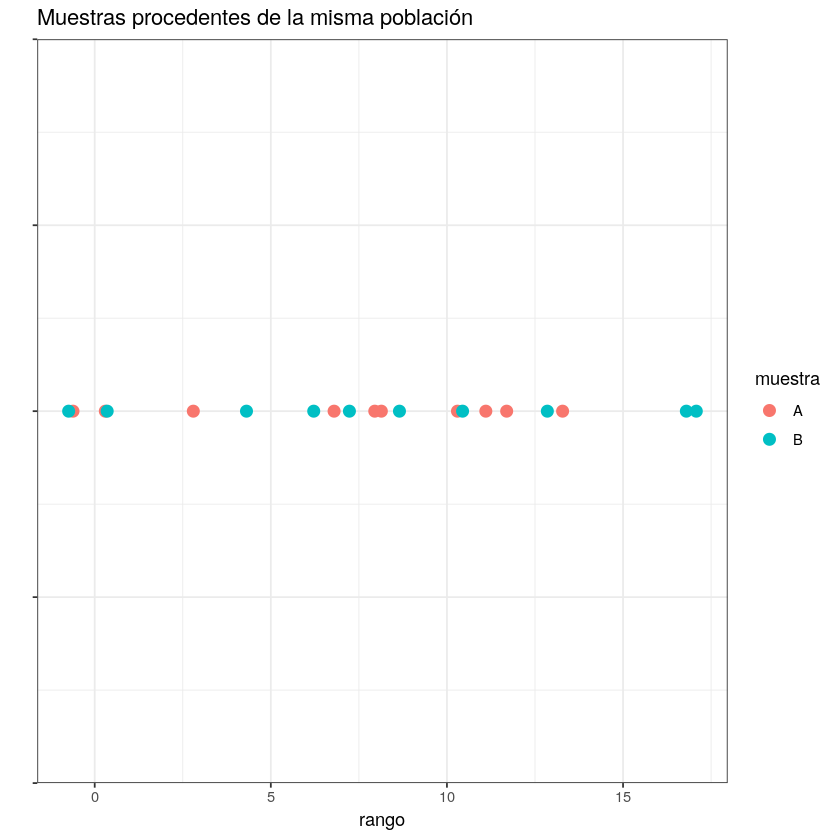

In [19]:
library(ggplot2)
set.seed(567)
datos <- data.frame(muestra = rep(c("A", "B"), each = 10),
valor = rnorm(n = 20, mean = 10, sd = 5),
cordenada_y = rep(0, 20))

ggplot(data = datos, aes(x = valor, y = cordenada_y)) +
geom_point(aes(colour = muestra), size = 3) +
ylab("") + xlab("rango") +
theme_bw() +
theme(axis.text.y = element_blank()) + 
ggtitle("Muestras procedentes de la misma población")

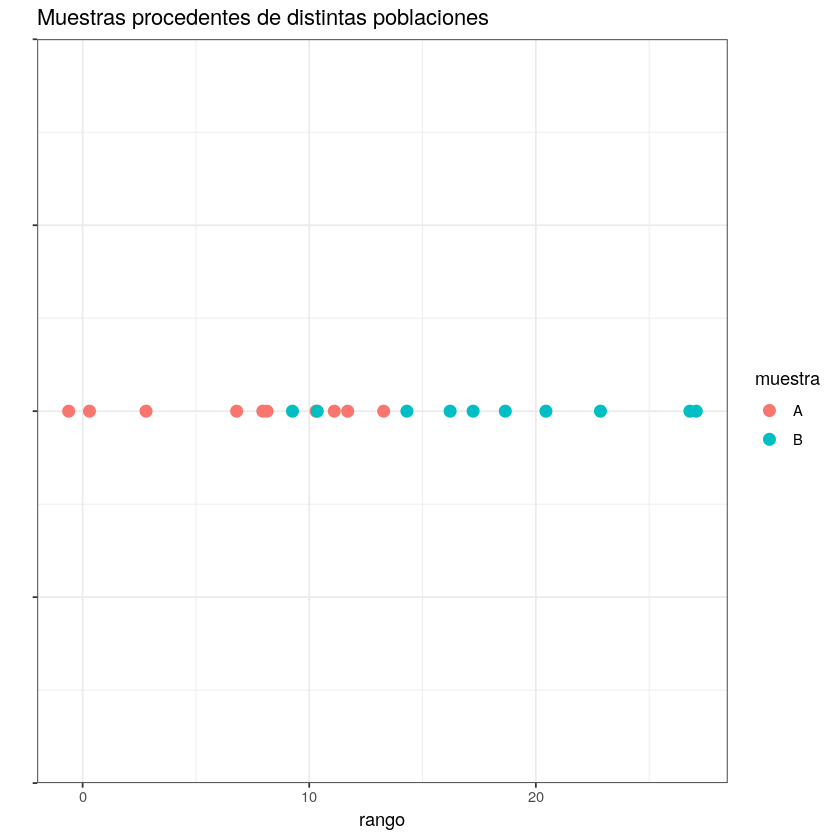

In [20]:
set.seed(567)
datos <- data.frame(
    muestra = rep(c("A", "B"), each = 10),
    valor = c(rnorm(n = 10, mean = 10, sd = 5), rnorm(n = 10, mean = 20, sd = 5)),
    cordenada_y = rep(0, 20)
)

ggplot(data = datos, aes(x = valor, y = cordenada_y)) +
    geom_point(aes(colour = muestra), size = 3) +
    ylab("") +
    xlab("rango") +
    theme_bw() +
    theme(axis.text.y = element_blank()) +
    ggtitle("Muestras procedentes de distintas poblaciones")

Acorde a esta idea, el test de Mann–Whitney–Wilcoxon contrasta que la probabilidad de que una observación de la población X supere a una observación de la población Y es igual a la probabilidad de que una observación de la población Y supere a una de la población X. Es decir, que los valores de una población no tienden a ser mayores que los de otra.


$$ H_{0} : P(X > Y) = P(Y > X) $$
$$ H_{0} : P(X > Y) = 0.5 $$
$$ H_{1} : P(X > Y) != P(Y > X) $$
$$ H_{1} : P(X > Y) != 0.5 $$

Es común encontrar mencionado que el test de Mann–Whitney–Wilcoxon compara medianas, sin embargo, esto solo es cierto cuando las poblaciones comparadas difieren únicamente es su localización, pero el resto de características (dispersión, asimetría…) son iguales.

Al igual que ocurre con muchos test no paramétricos, el test de Mann–Whitney–Wilcoxon es menos potente que el t-test (tienen menos probabilidad de rechazar la H0 cuando realmente es falsa) ya que ignora valores extremos. En el caso de los t-test, al trabajar con medias, si los tienen en cuenta. Esto hace a su vez que el test de Mann–Whitney–Wilcoxon sea una prueba más robusta que los t-test. En concreto, la perdida de potencia es del 5%.

### Condiciones necesarias del test de Mann–Whitney–Wilcoxon

- Los datos tienen que ser independientes.
- Los datos tienen que ser ordinales o bien se tienen que poder ordenar de menor a mayor.
- No es necesario asumir que las muestras se distribuyen de forma normal o que proceden de poblaciones normales. Pero, para que el test compare medianas, ambas han de tener el mismo tipo de distribución (varianza, asimetría…).
- Igualdad de varianza entre grupos (homocedasticidad).

Supóngase que se dispone de dos muestras, de las que no se conoce el tipo de distribución de las poblaciones de origen y cuyo tamaño es demasiado pequeño para determinar si siguen una distribución normal. ¿Existe una diferencia significativa entre poblaciones? Se emplea un ejemplo con muestras pequeñas para poder ilustrar fácilmente los pasos, no significa que con muestras tan pequeñas el test de Mann–Whitney–Wilcoxon sea preciso.

In [21]:
muestraX <- c(1.1, 3.4, 4.3, 2.1, 7.0, 2.5)
muestraY <- c(7.0, 8.0, 3.0, 5.0, 6.2, 4.4)

fligner.test(x = list(muestraX, muestraY))


	Fligner-Killeen test of homogeneity of variances

data:  list(muestraX, muestraY)
Fligner-Killeen:med chi-squared = 0.07201, df = 1, p-value = 0.7884


No hay evidencias en contra de la igualdad de varianzas.

Una vez comprobadas las condiciones necesarias para que el test de Mann–Whitney–Wilcoxon sea válido se procede a calcular su estadístico, p-value asociado y tamaño de efecto.

**Ordenación de las observaciones**

Se juntan todas las observaciones, se ordenan y se les asigna un número de posición, siendo la posición 1 para el valor más pequeño. En caso de haber valores repetidos, fenómeno conocido como ligadura o ties, se les asigna como valor de posición la media de las posiciones que ocupan. En este caso, el valor “7.0” está repetido dos veces, por lo que en lugar de asignarles “10” y “11”, se les asigna “10.5” a cada uno.

In [22]:
# unión de las muestras y ordenación

observaciones <- sort(c(muestraX, muestraY))

# La función rank() de R calcula las posiciones automáticamente,
# solucionando las ligaduras en caso de que las haya.

rango_observaciones <- rank(observaciones)
observaciones <- cbind(observaciones, rango_observaciones)
observaciones

observaciones,rango_observaciones
1.1,1.0
2.1,2.0
2.5,3.0
3.0,4.0
3.4,5.0
4.3,6.0
4.4,7.0
5.0,8.0
6.2,9.0
7.0,10.5


**Calculo del estadistico U**

$$ U = \min(U_{1}, U_{2}) $$ 

siendo U1 y U2 los valores estadísticos de U Mann-Whitney:

$$ U_{1} = n_{1}n_{2} + n1(n1+1)/2 - R_{1}$$

$$ U_{1} = n_{1}n_{2} + n2(n2+1)/2 - R_{2}$$

- n1 = tamaño de la muestra del grupo 1
- n2 = tamaño de la muestra del grupo 2
- R1 = sumatoria de los rangos del grupo 1
- R2 = sumatoria de los rangos del grupo 2

In [23]:
R1 <- sum(1, 5, 6, 2, 10.5, 3)
R2 <- sum(10.5, 12, 4, 8, 9, 7)
n1 <- length(muestraX)
n2 <- length(muestraY)
U1 <- (n1 * n2) + (n1 * (n1 + 1) / 2) - R1
U2 <- (n1 * n2) + (n2 * (n2 + 1) / 2) - R2
U <- min(c(U1, U2))
U

[1] 6.5

**Calculo de p-value**

Una vez ha obtenido el valor del estadístico U se puede calcular cual es la probabilidad de que adquiera un valor igual o más extremo que el observado. Si el tamaño de las muestras es inferior a 10, se compara el valor obtenido de U con los valores de una tabla U de Mann-Whitney. Si el U es menor que el valor correspondiente en la tabla, la diferencia es significativa. En este caso, el valor de la tabla para α=0.05, n1=6 y n2=6 es de 5. Dado que U obtenido es >5 no se considera significativa la diferencia. Si n1>10 y n2>10 se puede asumir que U se distribuye de forma aproximadamente normal, rechazando H0 si Z calculado es mayor que el valor de Z para el α elegido (este es método utilizado por defecto en R).

$$ Z = U - (n_{1}n_{2}/2)/ \sqrt(n_{1}n_{2}(n_{1}+n_{2}+1)/12) $$ 
se distribuye como Normal Estandar

**Cálculo del tamaño del efeto (side effect)**

Como en todo test estadístico, no solo hay que indicar el p-value sino también el tamaño del efecto observado, ya que esto permitirá saber si, además de significativa, la diferencia es práctica. El tamaño del efecto para un test de Mann–Whitney–Wilcoxon se calcula a partir del Z-factor (es necesario haber asumido que U se distribuye ~ Normal).

$$ r = abs(Z/\sqrt(N)) $$

Donde N es la suma de n_{1} y n_{2}. Una de las clasificaciones del tamaño más utilizada es:

- 0.1 = pequeño
- 0.3 = mediano
- => 0.5 = grande 

In [24]:
wilcox.test(x = muestraX, y = muestraY, alternative = "two.sided", mu = 0,
            paired = FALSE, conf.int = 0.95)

Warning message in wilcox.test.default(x = muestraX, y = muestraY, alternative = "two.sided", :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = muestraX, y = muestraY, alternative = "two.sided", :
“cannot compute exact confidence intervals with ties”



	Wilcoxon rank sum test with continuity correction

data:  muestraX and muestraY
W = 6.5, p-value = 0.07765
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -4.9000274  0.4000139
sample estimates:
difference in location 
             -2.390035 


In [25]:
library(coin)
# La función wilcox.test() del paquete coin requiere pasarle los argumentos en
# forma de función (~), por lo que los datos tienen que estar almacenados en
# forma de data frame.
datos <- data.frame(
    grupo   = as.factor(rep(c("A", "B"), c(6, 6))),
    valores = c(muestraX, muestraY)
)

wilcox_test(valores ~ grupo, data = datos, distribution = "exact", conf.int = 0.95)

Loading required package: survival




	Exact Wilcoxon-Mann-Whitney Test

data:  valores by grupo (A, B)
Z = -1.8447, p-value = 0.06926
alternative hypothesis: true mu is not equal to 0
95 percent confidence interval:
 -4.9  0.4
sample estimates:
difference in location 
                  -2.4 


In [26]:
# La función devuelve el valor de Z, por lo que se puede calcular fácilmente el
# tamaño del efecto
tamanyo_efecto <- 1.845 / sqrt(n1 + n2)
tamanyo_efecto

[1] 0.5326056

**Resultado**

La diferencia entre las probabilidades de que observaciones de una población superen a las de la otra no difiere de forma significativa (p-value = 0.06926). El tamaño del efecto observado es grande (0.53) pero no significativo.

### Comparación entre t-test y test de Mann–Whitney–Wilcoxon

Una de las aplicaciones más frecuentes del test de Mann–Whitney–Wilcoxon es su uso como alternativa al t-test cuando las muestras no proceden de poblaciones con distribución normal (asimetría o colas) o porque tienen un tamaño demasiado reducido para poder afirmarlo. Es importante tener en cuenta que, aunque ambos test permiten realizar inferencia sobre la diferencia entre poblaciones, las hipótesis contrastadas no son las mismas. Mientras que el t-test siempre compara las medias de los grupos, el test de Mann–Whitney–Wilcoxon es menos específico. Si las distribuciones de las poblaciones subyacentes se diferencian únicamente en localización, entonces el test de Mann–Whitney–Wilcoxon compara medianas, para el resto de escenarios (poblaciones con distinta distribución, dispersión, asimetría…) contrasta si P(X>Y)=P(Y>X). En este segundo caso la interpretación de los p-values no es tan directa. Es debido a esta naturaleza flexible por lo que hay que ser cauteloso con el test de Mann–Whitney–Wilcoxon. Por ejemplo, si las dos muestras comparadas proceden de poblaciones con asimetrías en direcciones opuestas, a pesar de que tanto la media como la mediana sean exactamente las mismas en ambos grupos, el p-value obtenido puede ser muy bajo.

En la práctica, el escenario en el que la única diferencia entre poblaciones es la localización es poco realista. Si las distribuciones tienen colas (asimetría) y las medias o medianas son distintas, es muy probable que las varianzas también lo sean. De hecho, la distribución normal es la única distribución estándar en la que la media y la varianza son independientes. Por lo tanto, si el test de Mann–Whitney–Wilcoxon se está aplicando por falta de normalidad y las medias-medianas no son iguales, lo más seguro es que no se cumpla con total rigurosidad la igualdad de varianzas. Es necesario evaluar estas características para poder determinar si el test de Mann–Whitney–Wilcoxon es suficientemente robusto para el estudio en cuestión.

Cuando la hipótesis que se quiere contrastar tiene que ser exclusivamente la igualdad de medianas se puede recurrir a la regresión de cuantiles, en concreto al cuantil 0.5.

## Test de Mann–Whitney–Wilcoxon aplicado a muestras con asimetría opuesta

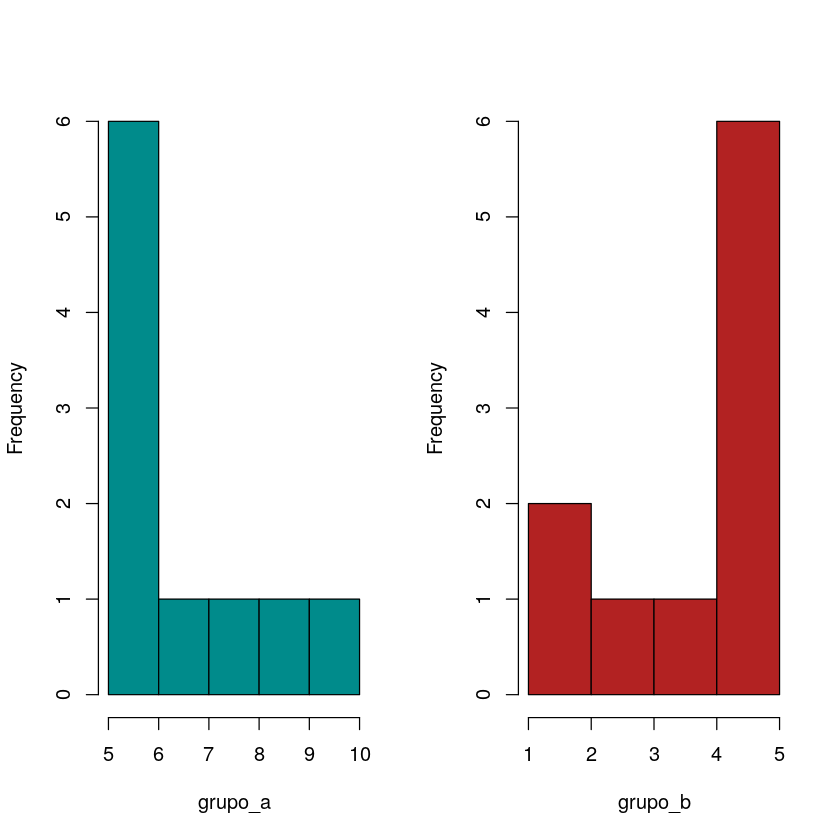

In [27]:
grupo_a <- c(5, 5, 5, 5, 5, 5, 7, 8, 9, 10)
grupo_b <- c(1, 2, 3, 4, 5, 5, 5, 5, 5, 5)
par(mfrow = c(1, 2))
hist(grupo_a, col = "cyan4", main = "")
hist(grupo_b, col = "firebrick", main = "")

En vista de que el tamaño muestral es pequeño y de que ambos grupos muestran una clara asimetría, el t-test queda descartado. Una posible alternativa es emplear el test de Mann–Whitney–Wilcoxon con la intención de comparar las medianas.

El p-value obtenido indica claras evidencias en contra de la hipótesis nula de que las medianas de ambos grupos son iguales. Sin embargo, si se calculan las medianas de las muestras, el resultado es el mismo.

In [28]:
wilcox.test(grupo_a, grupo_b, paired = FALSE)

Warning message in wilcox.test.default(grupo_a, grupo_b, paired = FALSE):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  grupo_a and grupo_b
W = 82, p-value = 0.007196
alternative hypothesis: true location shift is not equal to 0


### Potencial problema del test de Mann–Whitney–Wilcoxon con tamaños muestrales grandes

Suele recomendarse emplear el test de Mann–Whitney–Wilcoxon en lugar del t-test cuando los tamaños muestrales son pequeños y no se tiene evidencias de que las poblaciones de origen siguen una distribución normal. Si bien esta práctica está bastante fundamentada, no hay que confundirla con la de utilizar el test de Mann–Whitney–Wilcoxon como alternativa al t-test siempre que no se cumpla la normalidad y sin tener en cuenta el tamaño muestral. A medida que el número de observaciones aumenta, también lo hace la robustez del t-test frente a desviaciones de la normalidad. Por otro lado, el test de Mann–Whitney–Wilcoxon incrementa su sensibilidad a diferencias más allá de las medianas. Por ejemplo, aumenta el poder estadístico de detectar diferencias significativas en la probabilidad de que observaciones de un grupo superen a las del otro debido únicamente a diferencias en la dispersión de las poblaciones de origen y no porque sus medianas sean distintas. Si el objetivo del estudio es identificar cualquier diferencia distribucional, esto no supone un problema, pero si lo que se quiere comparar son las medianas, se obtendrán p-values que no se corresponden con la pregunta que el investigador quiere responder.

Considérese dos muestras que proceden de dos poblaciones distintas, una con distribución normal y otra con distribución log-normal (asimetría derecha). Ambas poblaciones tienen la misma mediana pero claramente siguen distribuciones distintas.

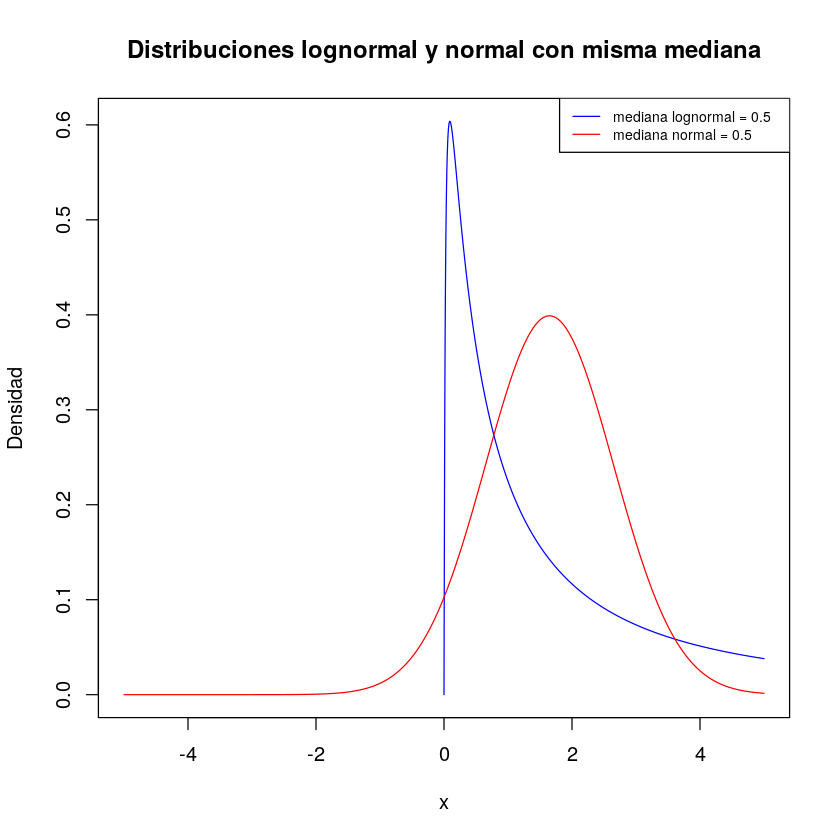

In [29]:
x <- seq(0, 5, length = 1000)
y <- dlnorm(x = x, meanlog = 0.5, sdlog = 1.7)
plot(x, y,
    type = "l", lty = 1, xlab = "x", col = "blue", ylab = "Densidad",
    main = "Distribuciones lognormal y normal con misma mediana", xlim = c(-5, 5)
)
x_2 <- seq(-5, 5, length = 1000)
y_2 <- dnorm(x = x_2, mean = 1.648721, sd = 1)
lines(x_2, y_2, col = "red")
legend("topright",
    legend = c("mediana lognormal = 0.5", "mediana normal = 0.5"),
    col = c("blue", "red"), lty = 1, cex = 0.7
)

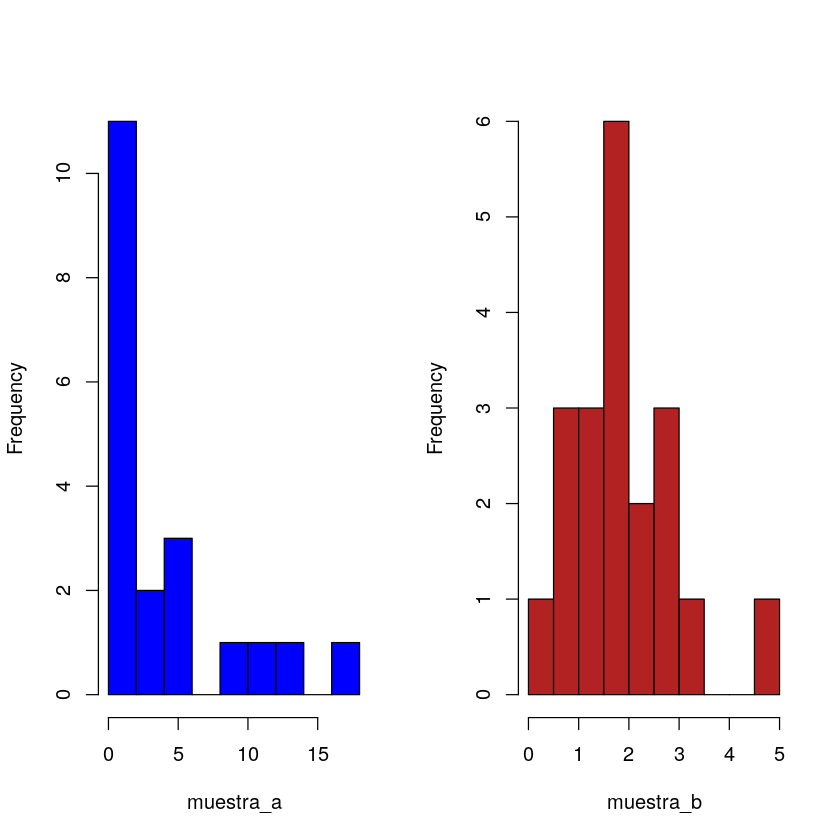

In [30]:
# Supóngase ahora que el investigador, que desconoce la distribución real de las poblaciones, 
# obtiene dos muestras de 20 observaciones cada una.

set.seed(888)
muestra_a <- rlnorm(n = 20, meanlog = 0.5, sdlog = 1.7)
muestra_b <- rnorm(n = 20, mean = 1.648721, sd = 1)
par(mfrow = c(1, 2))
hist(muestra_a, breaks = 10, main = "", col = "blue")
hist(muestra_b, breaks = 10, main = "", col = "firebrick")

En base a la falta de normalidad de la muestra a, el investigador considera que el t-test no es adecuado para comparar la localización de las poblaciones y decide que quiere comparar medianas con el test de Mann–Whitney–Wilcoxon.

In [31]:
wilcox.test(muestra_a, muestra_b, paired = FALSE)


	Wilcoxon rank sum test

data:  muestra_a and muestra_b
W = 196, p-value = 0.9254
alternative hypothesis: true location shift is not equal to 0


El resultado le indica que no hay evidencias para considerar que la localización de las poblaciones es distinta y concluye que las medianas de ambas poblaciones son iguales.

Véase lo que ocurre si el tamaño muestral se incrementa de 20 a 1000 observaciones.

In [32]:
set.seed(888)
muestra_a <- rlnorm(n = 1000, meanlog = 0.5, sdlog = 1.7)
muestra_b <- rnorm(n = 1000, mean = 1.648721, sd = 1)
wilcox.test(muestra_a, muestra_b, paired = FALSE)


	Wilcoxon rank sum test with continuity correction

data:  muestra_a and muestra_b
W = 551900, p-value = 5.842e-05
alternative hypothesis: true location shift is not equal to 0


En este caso, la conclusión obtenida es totalmente opuesta, hay muchas evidencias en contra de la hipótesis nula de que ambas poblaciones tienen la misma localización por lo que el investigador podría concluir erróneamente que las medianas de ambas poblaciones son distintas.

Este ejemplo pone de manifiesto la importancia que tiene el tamaño muestral en la potencia del test de Mann–Whitney–Wilcoxon y la necesidad de entender que, si las distribuciones no son iguales a excepción de su localización, el test es muy sensible detectando diferencias en las distribuciones a pesar de que sus medianas sean las mismas. En este caso, el investigador solo podría concluir que hay evidencias de que la distribución de las dos poblaciones se diferencia en algún aspecto, pero no podría concretar cuál.

## Prueba de los rangos con signo de Wilcoxon

El test no paramétrico prueba de los rangos con signo de Wilcoxon, también conocido como Wilcoxon signed-rank test, permite comparar poblaciones cuando sus distribuciones (normalmente interpretadas a partir de las muestras) no satisfacen las condiciones necesarias para otros test paramétricos. Es una alternativa al t-test de muestras dependientes cuando las muestras no siguen una distribución normal (muestran asimetría o colas) o cuando tienen un tamaño demasiado reducido para poder determinar si realmente proceden de poblaciones normales.

A la hora de elegir entre t-test o Wilcoxon signed-rank test, es importante tener en cuenta que, el problema de las muestras pequeñas, no se soluciona con ninguno de los dos. Si el tamaño de las muestras es pequeño, también lo es la calidad de la inferencia que se puede hacer con ellas. Ahora bien, existen dos situaciones en las que, a priori, se puede recomendar utilizar un Wilcoxon signed-rank test antes que un t-test:

- Si el tamaño de las muestras es suficientemente grande para determinar (por métodos gráficos o contrastes de hipótesis) que la distribución de las poblaciones a comparar no es de tipo normal, en tal caso, los t-test no son adecuados, por lo que mejor emplear un Wilcoxon signed-rank test (bootstrapping, regresión cuantílica, o test de permutación también podrían ser otras alternativa).
- Si el tamaño de las muestras no permite determinar con seguridad si las poblaciones de las que proceden se distribuyen de forma normal, y no se dispone de información que pueda orientar sobre la naturaleza de las poblaciones de origen (estudios anteriores, que sea un tipo de variable que se sabe que se distribuye casi siempre de forma normal…), entonces es más apropiado el Wilcoxon signed-rank test ya que no requiere asumir la normalidad de las poblaciones.

### El test Wilcoxon signed-rank test presenta las siguientes características:

- Es frecuente encontrar descrito que, el Wilcoxon signed-rank test, compara la mediana de las diferencias, sin embargo, esto solo es correcto bajo determinadas condiciones. A modo general, el Wilcoxon signed-rank test compara si las diferencias entre pares de datos siguen una distribución simétrica entorno a un valor. Si dos muestras proceden de la misma población, es de esperar que las diferencias entre cada par de observaciones se distribuyan de forma simétrica entorno al cero.

- Trabaja sobre rangos de orden, es decir, utilizan las posiciones que ocupan los datos una vez ordenados. Por lo tanto, solo es aplicable a variables cuyos valores se pueden ordenar.

- Tienen menos poder estadístico (menor probabilidad de rechazar la hipótesis nula cuando realmente es falsa) ya que ignoran valores extremos. En el caso de los t-test, al trabajar con medias, sí los tienen en cuenta. Esto a su vez, hace que el Wilcoxon signed-rank test sean una prueba más robusta que el t-test.

### Condiciones para la prueba de los rangos con signo de Wilcoxon

- Los datos tienen que ser dependientes.

- Los datos tienen que ser ordinales, se tienen que poder ordenar de menor a mayor o viceversa.

- No es necesario asumir que las muestras se distribuyen de forma normal o que proceden de poblaciones normales. Pero sea cual sea el tipo de distribución de las diferencias, tiene que ser simétrica.

- A pesar de considerarse el equivalente no paramétrico del t-test, el Wilcoxon signed-rank test trabaja con medianas, no con medias.

- Preferible al t-test cuando hay valores atípicos, no hay normalidad de los datos o el tamaño de las muestras es pequeño.

In [33]:
antes <- c(2, 5, 4, 6, 1, 3)
despues <- c(5, 6, 2, 7, 1, 6)

wilcox.test(x = antes, y = despues, alternative = "two.sided", mu = 0, paired = TRUE)

Warning message in wilcox.test.default(x = antes, y = despues, alternative = "two.sided", :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = antes, y = despues, alternative = "two.sided", :
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  antes and despues
V = 3, p-value = 0.2763
alternative hypothesis: true location shift is not equal to 0


En la salida devuelta por wilcox.test(), el estadístico se denomina V en lugar de W.

Cuando hay ligaduras o ties, wilcox.test() no es capaz de calcular el p-value exacto, por lo que devuelve un p-value aproximado asumiendo que W se distribuye de forma aproximadamente normal. En estos casos, o cuando los tamaños muestrales son mayores de 25, es recomendable emplear la función wilcoxsigned_test() del paquete coin, que devuelve el valor exacto de p-value en lugar de una aproximación.

In [34]:
require(coin)
# La función wilcoxsigned_test() del paquete coin requiere pasarle los argumentos
# en forma de función (~), por lo que los datos tienen que estar almacenados en
# forma de data frame.

datos <- data.frame(antes = antes, despues = despues)
wilcoxsign_test(antes ~ despues, data = datos, distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = -1.272, p-value = 0.25
alternative hypothesis: true mu is not equal to 0


## Test de Bartlett (python)

Perform Bartlett’s test for equal variances.

Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. For samples from significantly non-normal populations, Levene’s test levene is more robust.

In [3]:
from scipy.stats import bartlett
import numpy as np

a = [8.88, 9.12, 9.04, 8.98, 9.00, 9.08, 9.01, 8.85, 9.06, 8.99]
b = [8.88, 8.95, 9.29, 9.44, 9.15, 9.58, 8.36, 9.18, 8.67, 9.05]
c = [8.95, 9.12, 8.95, 8.85, 9.03, 8.84, 9.07, 8.98, 8.86, 8.98]
stat, p = bartlett(a, b, c)
p

1.1254782518834628e-05

In [4]:
#The results corresponds to the big size difference of the variance of b:

[np.var(x, ddof=1) for x in [a, b, c]] 

[0.007054444444444413, 0.13073888888888888, 0.008890000000000002]

## Test de Levene

Perform Levene test for equal variances.

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

Three variations of Levene’s test are possible. The possibilities and their recommended usages are:

- ‘median’ : Recommended for skewed (non-normal) distributions>

- ‘mean’ : Recommended for symmetric, moderate-tailed distributions.

- ‘trimmed’ : Recommended for heavy-tailed distributions.

The test version using the mean was proposed in the original article of Levene ([2]) while the median and trimmed mean have been studied by Brown and Forsythe ([3]), sometimes also referred to as Brown-Forsythe test.

In [5]:
from scipy.stats import levene

a = [8.88, 9.12, 9.04, 8.98, 9.00, 9.08, 9.01, 8.85, 9.06, 8.99]
b = [8.88, 8.95, 9.29, 9.44, 9.15, 9.58, 8.36, 9.18, 8.67, 9.05]
c = [8.95, 9.12, 8.95, 8.85, 9.03, 8.84, 9.07, 8.98, 8.86, 8.98]
stat, p = levene(a, b, c)
p

0.002431505967249681

In [6]:
[np.var(x, ddof=1) for x in [a, b, c]]

[0.007054444444444413, 0.13073888888888888, 0.008890000000000002]

# Data drift detection large datasets

TL;DR: We compared five different statistical tests for drift detection on large datasets. Our goal was to build intuition on how the tests react to data changes of varying magnitude. We also share the code so you can run the experiments on your data.

When ML models are in production, one often needs to keep tabs on the data drift. The goal is to detect changes in the input data distributions to make sure the model still operates in a familiar environment. Applying statistical tests to compare the new data with the old is one way to do it.

However, the test outcomes may differ for "small" and "large" datasets.

**Too much data, too much drift**

Each statistical test has particular properties and in-built assumptions.

*Let's take a two-sample Kolmogorov-Smirnov (KS) test.* It is often a default choice for detecting a distributional change in numerical features. While it does the job in many cases, the test can be "too sensitive" for larger datasets. It would fire alarms for many real-world use cases all the time, just because you have a lot of data and small changes add up. You need to account for such test behavior when picking your drift metric.

## Picking the drift metric

OK, so measuring data drift for large datasets is hard. The good news is choosing the proper statistical test for the occasion is half the battle.

But there are dozens of tests out there! How do you choose the best one?

We've run some experiments and compared five popular statistical tests to answer this. In particular, we wanted to explore how the test results differ based on the data volume and magnitude of change.

We hope it will help shape your intuition on how different tests behave on large datasets and how to choose the right one for your scenario.

The list of statistical tests that will be use are:
- Kolmogorov-Smirnov test
- Population Stability index (PSI)
- Wasserstein distance test (earth-mover-distance)
- Kullback-leibler divergence
- Jensen-Shannon distance

First, we chose three features with different characteristics:

- Feature 1— a continuous feature with non-normal distribution. For convenience, let's call it the "Multimodal feature."
- Feature 2— a variable with a heavy right tail. We'll call it the "Right-tailed feature."
- Feature 3— hereafter referred to as "Feature with outliers."

We picked these variables from three different publicly available datasets. The goal was to have features with various distribution shapes. For each variable, we had from 500,000 to 1 million observations.

Then, we implemented a function to imitate data drift. We wanted to introduce an artificial change that would resemble real-world drift. To do that, we decided to shift the whole distribution for each feature by a fixed value. Here is the formula we used to create drift:

$$ (alpha + mean(feature))*perc $$

By using the mean value of each feature, we ensured that:

1. The shift was relative to the feature value range
2. It was possible to compare how tests behave for different features with a specific "drift size."


Once we came up with this artificial drift function, we applied this change to all or some points in the "current" dataset. We used two sets of parameters to imitate various degrees of drift:

- drift_size: the percent by which we increase the initial values,
- drift_ratio: the share of data points to which we apply the defined increase to imitate drift in a segment of data.

### 